In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
######
renewableData = pd.read_csv("/Users/lucasmazza/Desktop/RenewableEnergyData/01 renewable-share-energy.csv")


In [21]:
#filter down to the United States, United Kingdom, China and Russia
renewableData['Entity'] = renewableData['Entity'].astype(str)
selected_countries = ['United States', 'United Kingdom', 'China', 'Russia','India','Canada']
selected_data = renewableData[renewableData['Entity'].isin(selected_countries)]

(322, 4)

In [36]:
#understanding the data: 
    #Entity: is the name of the contry
    #Code: code for the country 
    #Year: year studied - Updated to 2021
    #Renewables (% equivalent primary energy): The value for this indicator represents the percentage of energy consumed from renewable sources relative to the total energy consumed from all sources

<bound method Series.unique of 0       1965
1       1966
2       1967
3       1968
4       1969
        ... 
5598    2017
5599    2018
5600    2019
5601    2020
5602    2021
Name: Year, Length: 5603, dtype: int64>


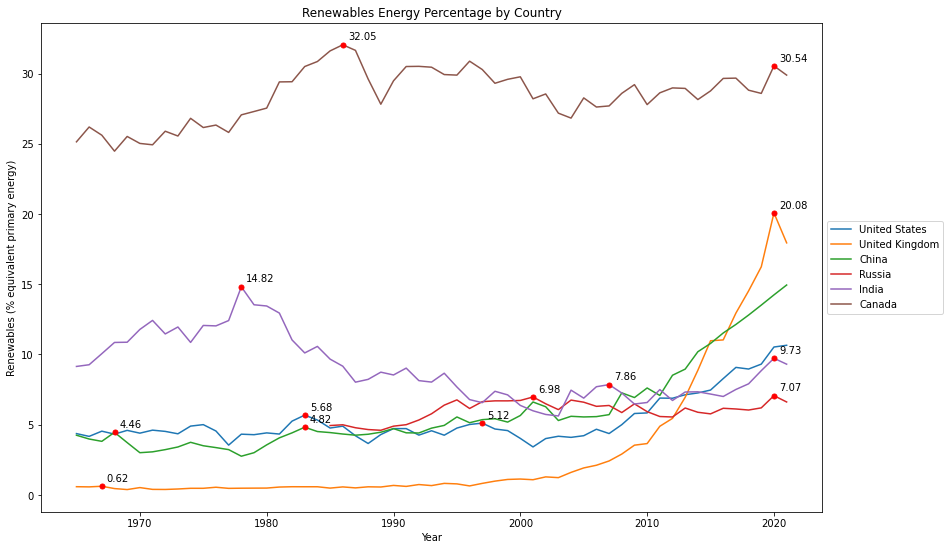

In [34]:
fig, ax = plt.subplots(figsize = (14,9))

for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    ax.plot(country_data['Year'], country_data['Renewables (% equivalent primary energy)'], label=country)
       # Find peaks using scipy.signal.argrelextrema
     # Find peaks using scipy.signal.argrelextrema
    peaks = argrelextrema(country_data['Renewables (% equivalent primary energy)'].values, comparator=np.greater, order=10)

    # Plot peaks as red markers
    ax.plot(country_data['Year'].values[peaks], country_data['Renewables (% equivalent primary energy)'].values[peaks],
            'ro', markersize=5)
    # Mark numerical values of the peaks
    peak_values = country_data['Renewables (% equivalent primary energy)'].values[peaks]
    for year, value in zip(country_data['Year'].values[peaks], peak_values):
        ax.annotate(f'{value:.2f}', xy=(year, value), xytext=(5, 5), textcoords='offset points')
# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Renewables (% equivalent primary energy)')
ax.set_title('Renewables Energy Percentage by Country')

# Move the legend to the side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.tight_layout
plt.show()


In [40]:
#identifying the biggest year to year jump for each country
jumps = {}
biggest_jumps = {}

for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country].copy()
    country_data['Renewable_Jump'] = country_data['Renewables (% equivalent primary energy)'].diff()
    max_jump = country_data['Renewable_Jump'].max()
    max_jump_year = country_data.loc[country_data['Renewable_Jump'].idxmax(), 'Year']
    biggest_jumps[country] = (max_jump_year, max_jump)

for country, (year, jump) in biggest_jumps.items():
    print(f"Biggest jump in renewable energy for {country}: {jump:.2f}% in {year}")





Biggest jump in renewable energy for United States: 1.22% in 2020
Biggest jump in renewable energy for United Kingdom: 3.84% in 2020
Biggest jump in renewable energy for China: 1.55% in 2008
Biggest jump in renewable energy for Russia: 0.87% in 2020
Biggest jump in renewable energy for India: 2.40% in 1978
Biggest jump in renewable energy for Canada: 1.96% in 2020


In [42]:
#identifying the smallest year to year jump for each country
jumps = {}
smallest_jumps = {}

for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country].copy()
    country_data['Renewable_Jump'] = country_data['Renewables (% equivalent primary energy)'].diff()
    max_jump = country_data['Renewable_Jump'].max()
    max_jump_year = country_data.loc[country_data['Renewable_Jump'].idxmin(), 'Year']
    biggest_jumps[country] = (max_jump_year, max_jump)

for country, (year, jump) in biggest_jumps.items():
    print(f"Smallest jump in renewable energy for {country}: {jump:.2f}% in {year}")

Smallest jump in renewable energy for United States: 1.22% in 1977
Smallest jump in renewable energy for United Kingdom: 3.84% in 2021
Smallest jump in renewable energy for China: 1.55% in 2003
Smallest jump in renewable energy for Russia: 0.87% in 1996
Smallest jump in renewable energy for India: 2.40% in 1982
Smallest jump in renewable energy for Canada: 1.96% in 1988


In [43]:
#Amount of energy produced per renewable category: 
renewType = pd.read_csv("/Users/lucasmazza/Desktop/RenewableEnergyData/02 modern-renewable-energy-consumption.csv")
#select relavant countries

,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Africa,NaN,1971,0.16400,0.00000,0.0000,26.013390
1,Africa,NaN,1972,0.16500,0.00000,0.0000,29.633196
2,Africa,NaN,1973,0.17000,0.00000,0.0000,31.345707
3,Africa,NaN,1974,0.17500,0.00000,0.0000,35.667076
4,Africa,NaN,1975,0.17200,0.00000,0.0000,37.717968
...,...,...,...,...,...,...,...
5605,World,OWID_WRL,2017,596.42050,445.46628,1140.3931,4069.982700
5606,World,OWID_WRL,2018,643.03204,576.23090,1269.9792,4183.166500
5607,World,OWID_WRL,2019,674.74536,703.94977,1420.5441,4231.377000
5608,World,OWID_WRL,2020,703.91644,846.22940,1596.4282,4345.990000


In [44]:
#filter down to the United States, United Kingdom, China and Russia
renewType['Entity'] = renewType['Entity'].astype(str)
renewType = renewType[renewType['Entity'].isin(selected_countries)]

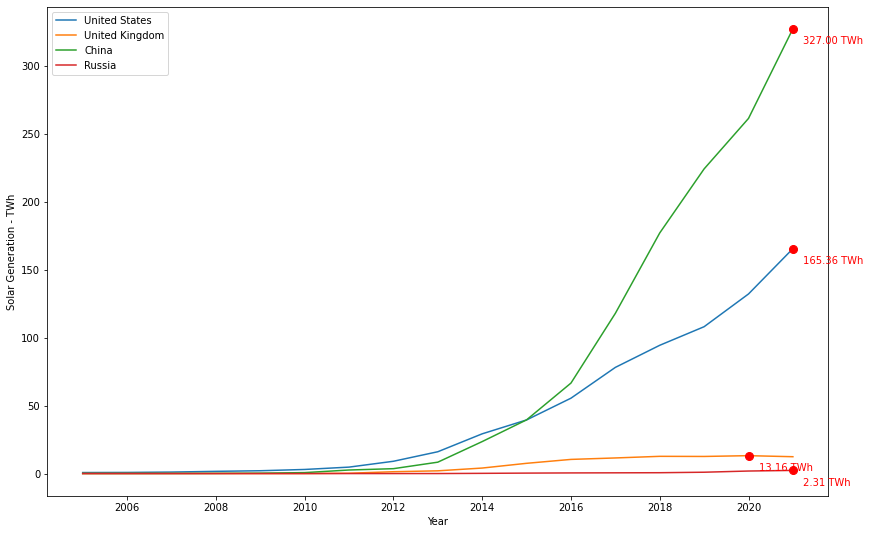

In [57]:
#countries Solar generation

fig, ax = plt.subplots(figsize = (14,9))
countries = ['United States', 'United Kingdom', 'China', 'Russia']
filtered_data = renewType[renewType['Entity'].isin(countries)]
#solar_data = filtered_data[(filtered_data['Year'] >= 2005) & (filtered_data['Year'] <= 2021)]


for country in countries:
    country_data = solar_data[solar_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Solar Generation - TWh'], label=country)
     # Find the maximum value and its index
    max_value = country_data['Solar Generation - TWh'].max()
    max_index = country_data['Solar Generation - TWh'].idxmax()
    
    # Mark the maximum value with a red dot
    plt.plot(country_data.loc[max_index, 'Year'], max_value, 'ro', markersize=8)
    
    # Annotate the maximum value
    plt.annotate(f"{max_value:.2f} TWh", (country_data.loc[max_index, 'Year'], max_value),
                 xytext=(10, -15), textcoords='offset points', color='red')
    

plt.xlabel('Year')
plt.ylabel('Solar Generation - TWh')
plt.legend()
plt.show()


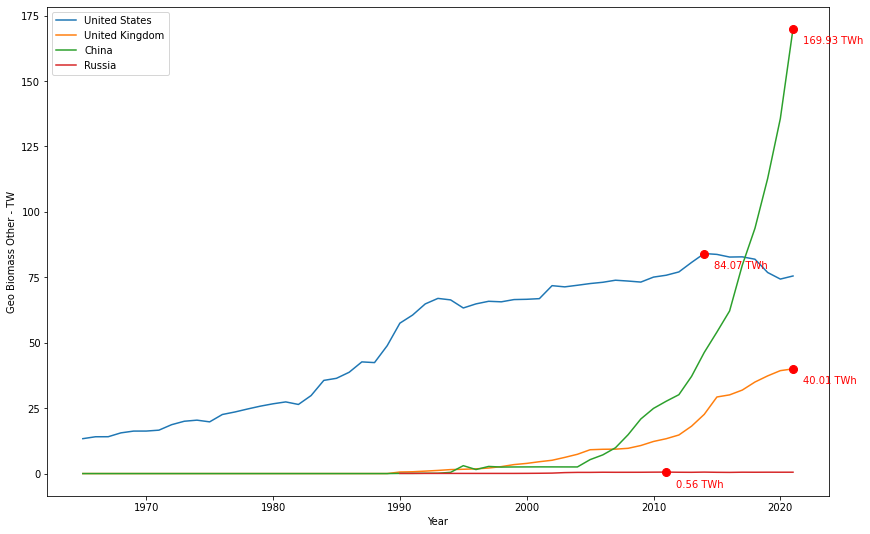

In [56]:
fig, ax = plt.subplots(figsize = (14,9))
countries = ['United States', 'United Kingdom', 'China', 'Russia']
filtered_data = renewType[renewType['Entity'].isin(countries)]
#solar_data = filtered_data[(filtered_data['Year'] >= 2005) & (filtered_data['Year'] <= 2021)]


for country in countries:
    country_data = filtered_data[filtered_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Geo Biomass Other - TWh'], label=country)
     # Find the maximum value and its index
    max_value = country_data['Geo Biomass Other - TWh'].max()
    max_index = country_data['Geo Biomass Other - TWh'].idxmax()
    
    # Mark the maximum value with a red dot
    plt.plot(country_data.loc[max_index, 'Year'], max_value, 'ro', markersize=8)
    
    # Annotate the maximum value
    plt.annotate(f"{max_value:.2f} TWh", (country_data.loc[max_index, 'Year'], max_value),
                 xytext=(10, -15), textcoords='offset points', color='red')
    

plt.xlabel('Year')
plt.ylabel('Geo Biomass Other - TW')
plt.legend()
plt.show()

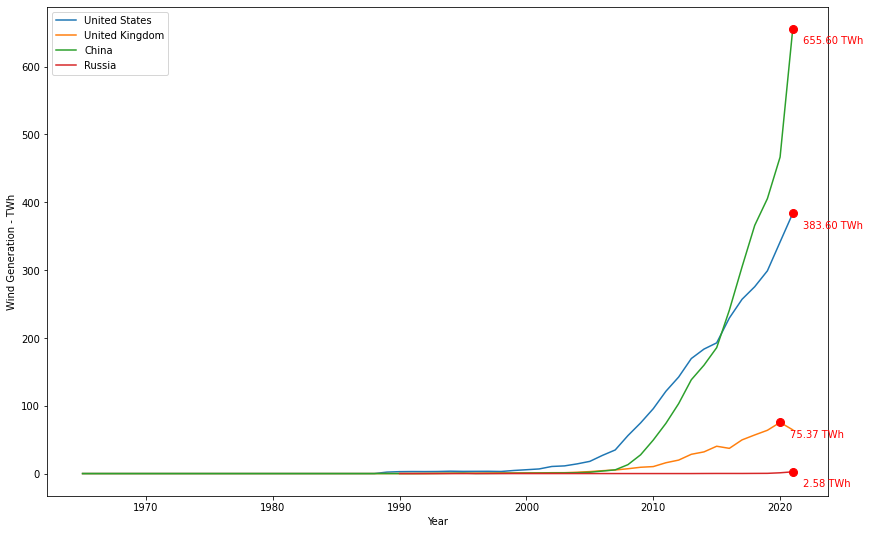

In [58]:
fig, ax = plt.subplots(figsize = (14,9))
countries = ['United States', 'United Kingdom', 'China', 'Russia']
filtered_data = renewType[renewType['Entity'].isin(countries)]
#solar_data = filtered_data[(filtered_data['Year'] >= 2005) & (filtered_data['Year'] <= 2021)]


for country in countries:
    country_data = filtered_data[filtered_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Wind Generation - TWh'], label=country)
     # Find the maximum value and its index
    max_value = country_data['Wind Generation - TWh'].max()
    max_index = country_data['Wind Generation - TWh'].idxmax()
    
    # Mark the maximum value with a red dot
    plt.plot(country_data.loc[max_index, 'Year'], max_value, 'ro', markersize=8)
    
    # Annotate the maximum value
    plt.annotate(f"{max_value:.2f} TWh", (country_data.loc[max_index, 'Year'], max_value),
                 xytext=(10, -15), textcoords='offset points', color='red')
    

plt.xlabel('Year')
plt.ylabel('Wind Generation - TWh')
plt.legend()
plt.show()

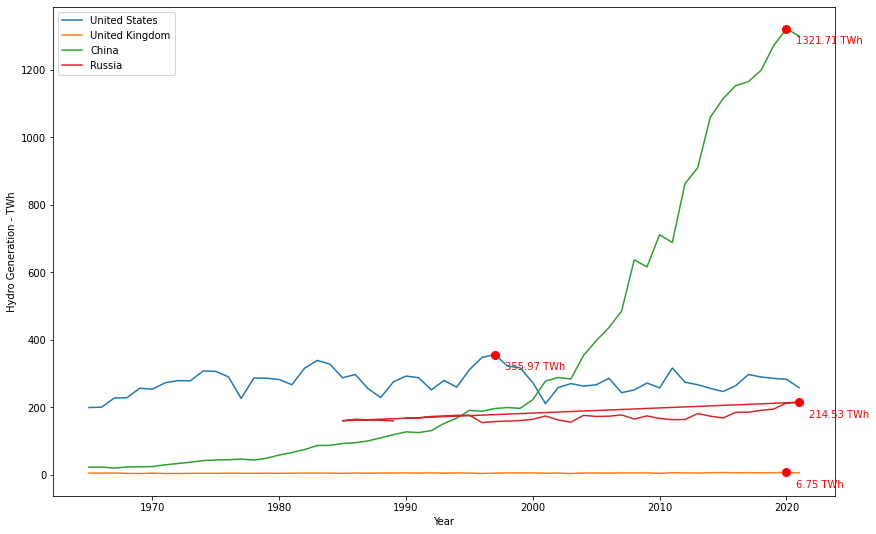

In [59]:
fig, ax = plt.subplots(figsize = (14,9))
countries = ['United States', 'United Kingdom', 'China', 'Russia']
filtered_data = renewType[renewType['Entity'].isin(countries)]
#solar_data = filtered_data[(filtered_data['Year'] >= 2005) & (filtered_data['Year'] <= 2021)]


for country in countries:
    country_data = filtered_data[filtered_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Hydro Generation - TWh'], label=country)
     # Find the maximum value and its index
    max_value = country_data['Hydro Generation - TWh'].max()
    max_index = country_data['Hydro Generation - TWh'].idxmax()
    
    # Mark the maximum value with a red dot
    plt.plot(country_data.loc[max_index, 'Year'], max_value, 'ro', markersize=8)
    
    # Annotate the maximum value
    plt.annotate(f"{max_value:.2f} TWh", (country_data.loc[max_index, 'Year'], max_value),
                 xytext=(10, -15), textcoords='offset points', color='red')
    

plt.xlabel('Year')
plt.ylabel('Hydro Generation - TWh')
plt.legend()
plt.show()

In [60]:
#solar capacity: 
solarCap = pd.read_csv("/Users/lucasmazza/Desktop/RenewableEnergyData/13 installed-solar-PV-capacity.csv")
display(solarCap)

,Entity,Code,Year,Solar Capacity
0,Africa,NaN,1996,0.001112
1,Africa,NaN,1997,0.003137
2,Africa,NaN,1998,0.005162
3,Africa,NaN,1999,0.008199
4,Africa,NaN,2000,0.010927
...,...,...,...,...
1654,World,OWID_WRL,2017,390.206530
1655,World,OWID_WRL,2018,483.011800
1656,World,OWID_WRL,2019,584.685700
1657,World,OWID_WRL,2020,710.281100


In [66]:
#filter down to the United States, United Kingdom, China and Russia
solarCap['Entity'] = solarCap['Entity'].astype(str)

solarCap = solarCap[solarCap['Entity'].isin(selected_countries)]

[]
[]
[]
[]


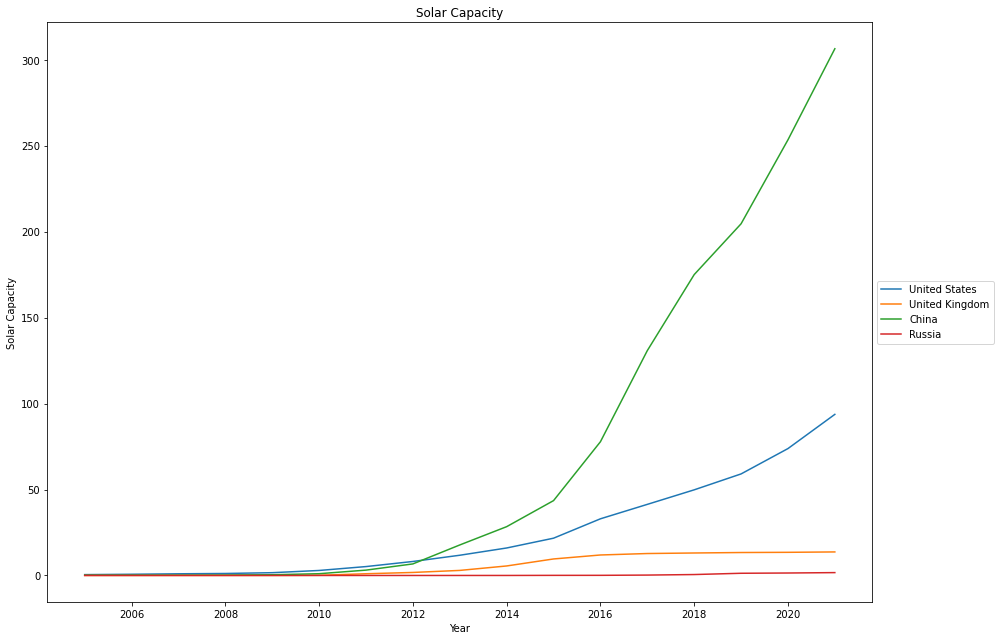

In [75]:


fig, ax = plt.subplots(figsize=(14, 9))

selected_countries = ['United States', 'United Kingdom', 'China', 'Russia']
solarCap = solarCap[(solarCap['Year'] >= 2005) & (solarCap['Year'] <= 2021)]
for country in selected_countries:
    country_data = solarCap[solarCap['Entity'] == country]
   
    ax.plot(country_data['Year'], country_data['Solar Capacity'], label=country)
    
    # Find peaks using scipy.signal.argrelextrema
    peaks = argrelextrema(country_data['Solar Capacity'].values, np.greater, order=10)
    print(peaks)
    # Plot peaks as red markers
    ax.plot(country_data['Year'].values[peaks], country_data['Solar Capacity'].values[peaks],
            'ro', markersize=5)
    

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Solar Capacity')
ax.set_title('Solar Capacity')

# Move the legend tao the side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.tight_layout()
plt.show()


/Users/lucasmazza/opt/anaconda3/envs/my-env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/lucasmazza/opt/anaconda3/envs/my-env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


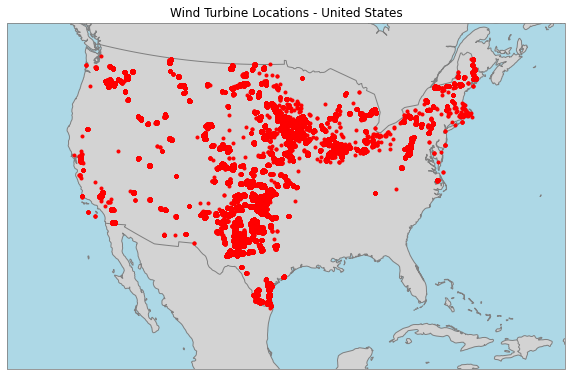

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

windturbData = pd.read_csv("/Users/lucasmazza/Desktop/RenewableEnergyData/uswtdb_v6_0_20230531.csv")

xlong = windturbData['xlong']
ylat = windturbData['ylat']

# Create a Cartopy map
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39)})

# Customize the map style
ax.set_facecolor('lightblue')
ax.spines['geo'].set_edgecolor('gray')

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')

# Plot wind turbine locations
ax.plot(xlong, ylat, 'ro', markersize=3, transform=ccrs.PlateCarree())

# Set map extent to cover the contiguous United States
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

# Add a title
plt.title('Wind Turbine Locations - United States')

# Display the map
plt.show()


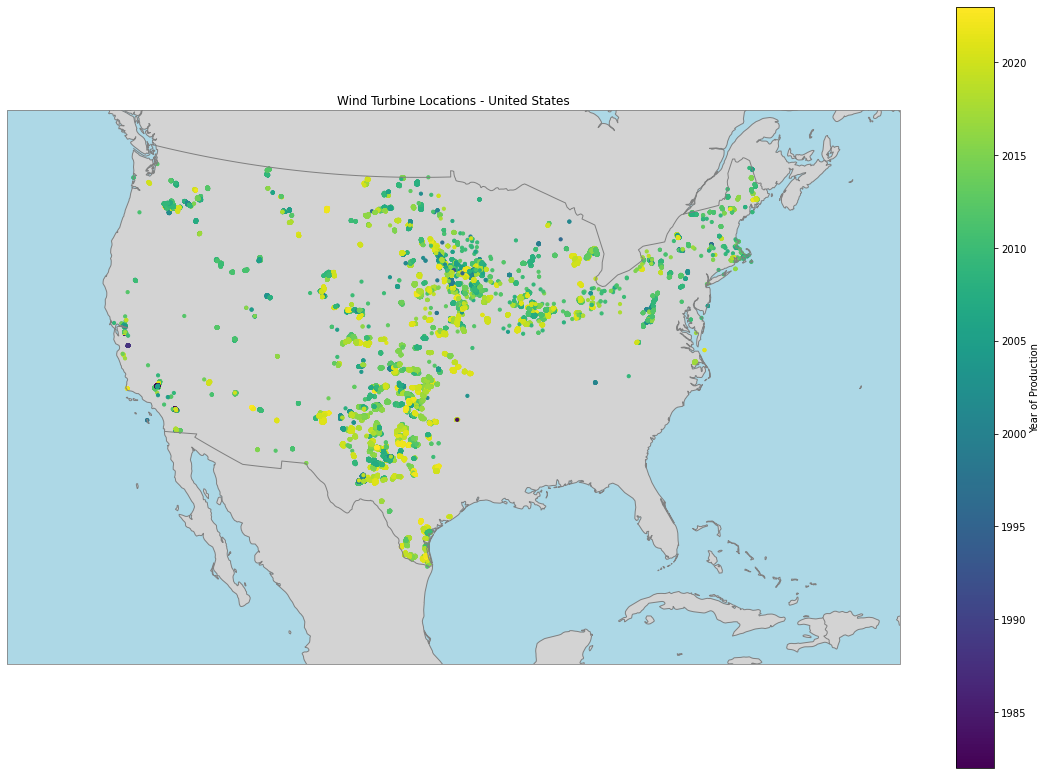

In [8]:

p_year = windturbData['p_year']

# Define colormap for the years
cmap = plt.cm.get_cmap('viridis')  # Choose a colormap, e.g., 'viridis'

# Create a Cartopy map
fig, ax = plt.subplots(figsize=(20, 14), subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39)})

# Customize the map style
ax.set_facecolor('lightblue')
ax.spines['geo'].set_edgecolor('gray')

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')

# Plot wind turbine locations with color based on p_year
sc = ax.scatter(xlong, ylat, c=p_year, cmap=cmap, s=10, transform=ccrs.PlateCarree())

# Set map extent to cover the contiguous United States
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, label='Year of Production')

# Add a title
plt.title('Wind Turbine Locations - United States')

# Display the map
plt.show()
